<a href="https://colab.research.google.com/github/Gousepasha789/Information-Retrieval-System/blob/main/Implement_Word_Analysis_and_Word_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Download required NLTK datasets (if not already installed)
nltk.download('punkt')
nltk.download('stopwords')
# Download the 'punkt_tab' dataset
nltk.download('punkt_tab') # This line is added to download the missing 'punkt_tab' dataset

# Sample text (could be from a file or any input text)
text = """"The cat chased the cat, and the dog chased the dog. The bird saw the bird, and the fish watched the fish."""

# Tokenize text into words
words = word_tokenize(text.lower())  # Convert to lowercase to ensure uniformity

# Remove punctuation and stopwords
words = [word for word in words if word not in string.punctuation and word not in stopwords.words('english')]

# Count the frequency of each word
word_freq = Counter(words)

# Display word frequency
print("Word Frequency Analysis:")
for word, freq in word_freq.most_common():
    print(f"{word}: {freq}")

Word Frequency Analysis:
cat: 2
chased: 2
dog: 2
bird: 2
fish: 2
``: 1
saw: 1
watched: 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


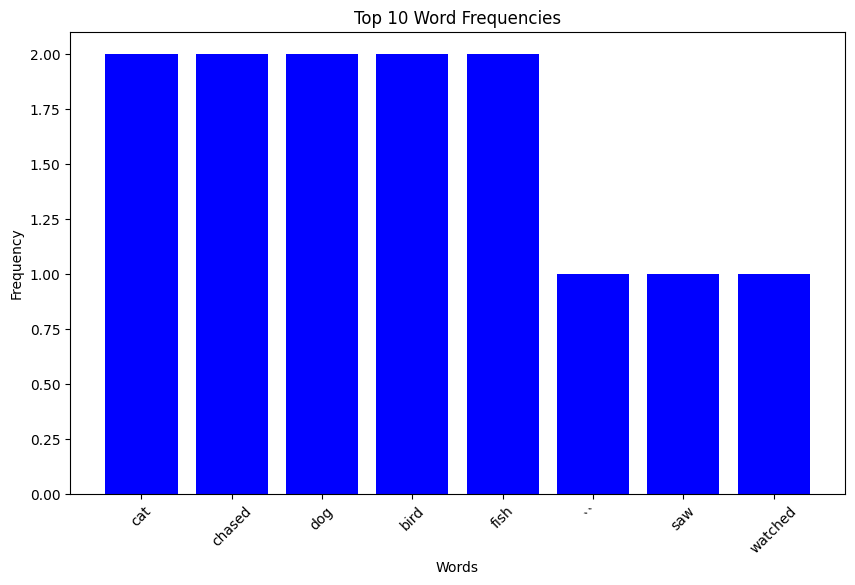

In [ ]:
import matplotlib.pyplot as plt

# Plotting the word frequencies
words, freqs = zip(*word_freq.most_common(10))  # Get top 10 frequent words

plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequencies')
plt.xticks(rotation=45)
plt.show()


In [ ]:
pip install transformers torch


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Encode the input text (prompt)
input_text = "The cat chased the cat, and the dog chased the dog. The bird saw the bird, and the fish watched the fish"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Generate text from the model
output = model.generate(input_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50, top_p=0.95)

# Decode the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated Text:")
print(generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:
The cat chased the cat, and the dog chased the dog. The bird saw the bird, and the fish watched the fish.

The bird then ran away, but the animal ran back. Then the birds ran off. And the cats ran. They ran to the house. But the dogs ran, too. So the animals ran and ran again. It was like a dream. I was in the dream, I saw a cat running, a dog running. That was the beginning of the


In [ ]:
import random

# Function to create a Markov chain model from text
def generate_markov_chain(text, n=2):
    words = text.split()
    markov_chain = {}

    for i in range(len(words) - n):
        gram = tuple(words[i:i+n])
        next_word = words[i+n]
        if gram not in markov_chain:
            markov_chain[gram] = []
        markov_chain[gram].append(next_word)

    return markov_chain

# Function to generate text from the Markov chain
def generate_markov_text(markov_chain, length=50):
    # Randomly choose a starting gram
    # Instead of using random.choice directly on markov_chain.keys(),
    # convert it to a list first to avoid potential issues in some Python versions.
    gram = random.choice(list(markov_chain.keys()))
    output = list(gram)

    for _ in range(length - len(gram)):
        # Check if the gram exists in the Markov chain before proceeding
        if gram in markov_chain:
            next_word = random.choice(markov_chain[gram])
            output.append(next_word)
            gram = tuple(output[-len(gram):])
        else:
            # If the gram is not found, break the loop to avoid the KeyError
            break

    return ' '.join(output)

# Sample text for Markov chain generation
sample_text = "The cat chased the cat, and the dog chased the dog. The bird saw the bird, and the fish watched the fish."

# Generate Markov chain model
markov_chain = generate_markov_chain(sample_text, n=2)

# Generate new text
new_text = generate_markov_text(markov_chain, length=20)
print("Generated Markov Text:")
print(new_text)

Generated Markov Text:
the bird, and the fish watched the fish.


In [ ]:
from collections import Counter
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary datasets
nltk.download('punkt')
nltk.download('stopwords')

def compute_tf(text):
    # Tokenize the text
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove punctuation and stopwords
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

    # Count word occurrences
    word_count = Counter(words)

    # Compute total words in the document
    total_words = sum(word_count.values())

    # Calculate TF for each word
    tf = {word: count / total_words for word, count in word_count.items()}

    return tf

# Sample text
text = """
Machine learning is a field of artificial intelligence that allows computers to learn patterns
from data and make predictions. It is widely used in various industries, including healthcare,
finance, and marketing.
"""

# Compute TF
tf_values = compute_tf(text)

# Display results
print("Term Frequency (TF):")
for word, value in tf_values.items():
    print(f"{word}: {value:.4f}")

Term Frequency (TF):
machine: 0.0500
learning: 0.0500
field: 0.0500
artificial: 0.0500
intelligence: 0.0500
allows: 0.0500
computers: 0.0500
learn: 0.0500
patterns: 0.0500
data: 0.0500
make: 0.0500
predictions: 0.0500
widely: 0.0500
used: 0.0500
various: 0.0500
industries: 0.0500
including: 0.0500
healthcare: 0.0500
finance: 0.0500
marketing: 0.0500


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
